In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart Disease data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

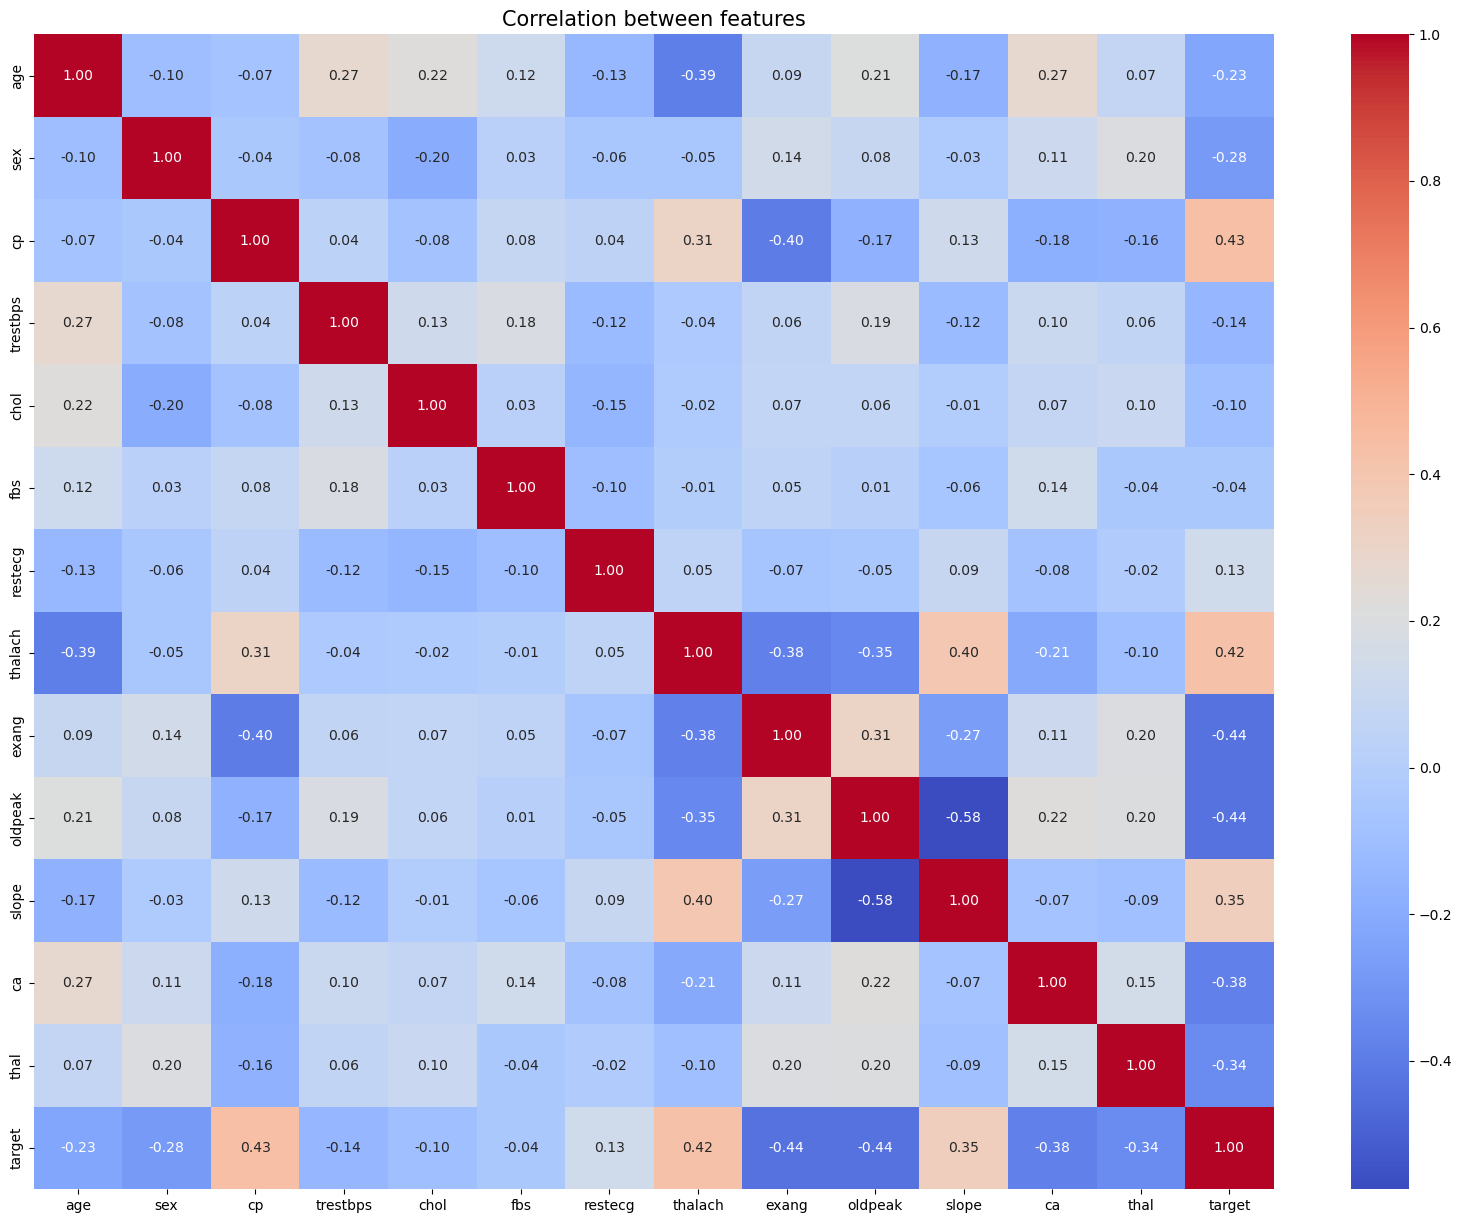

In [5]:
df_corr=df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between features', fontsize = 15)
plt.show()

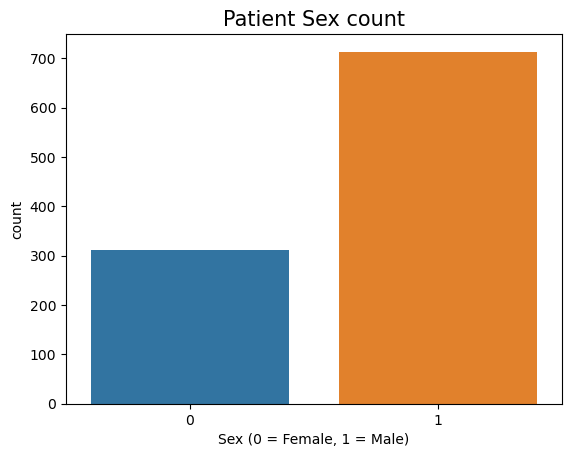

In [6]:
sns.countplot(data = df, x ='sex')
plt.title('Patient Sex count', fontsize = 15)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

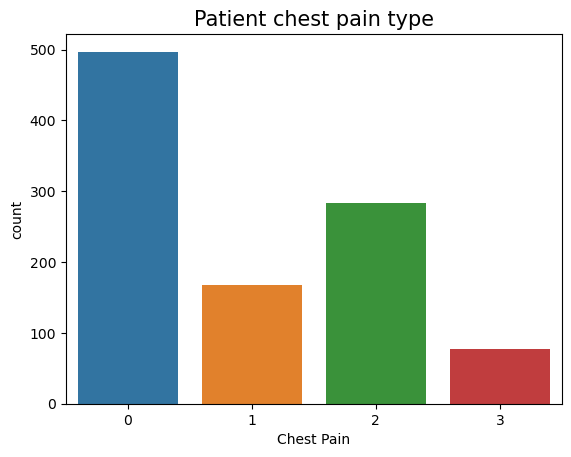

In [7]:
sns.countplot(data = df, x ='cp')
plt.title('Patient chest pain type', fontsize = 15)
plt.xlabel('Chest Pain')
plt.show()

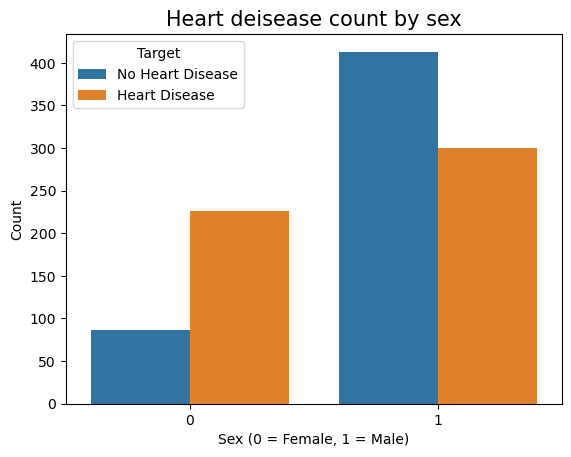

In [8]:
sns.countplot(data=df, x = 'sex', hue='target')
plt.title('Heart deisease count by sex', fontsize = 15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

In [9]:
fe_df = df[df['sex']==0]
fe_df['target'].value_counts()

1    226
0     86
Name: target, dtype: int64

In [10]:
m_df=df[df['sex']==1]
m_df['target'].value_counts()

0    413
1    300
Name: target, dtype: int64

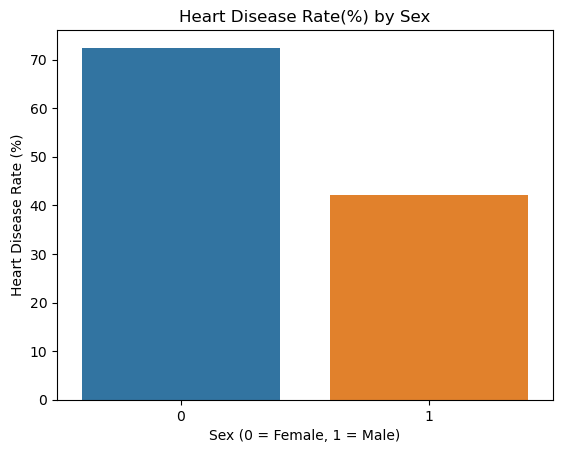

In [11]:
Disease_group = df.groupby('sex')['target'].mean()*100
sns.barplot(x=Disease_group.index, y=Disease_group.values)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Heart Disease Rate (%)')
plt.title('Heart Disease Rate(%) by Sex')
plt.show()

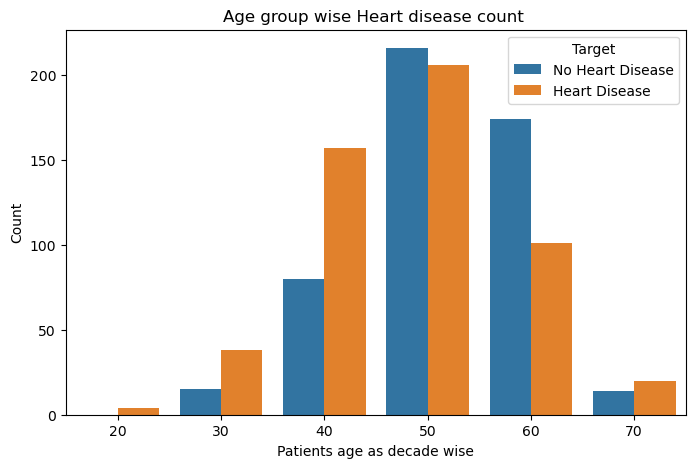

In [12]:
df['age_decade'] = (df['age']//10)*10
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='age_decade', hue='target', data=df)
plt.legend(title='Target',labels = ['No Heart Disease','Heart Disease'])
plt.xlabel('Patients age as decade wise')
plt.ylabel('Count')
plt.title('Age group wise Heart disease count ')
plt.show()

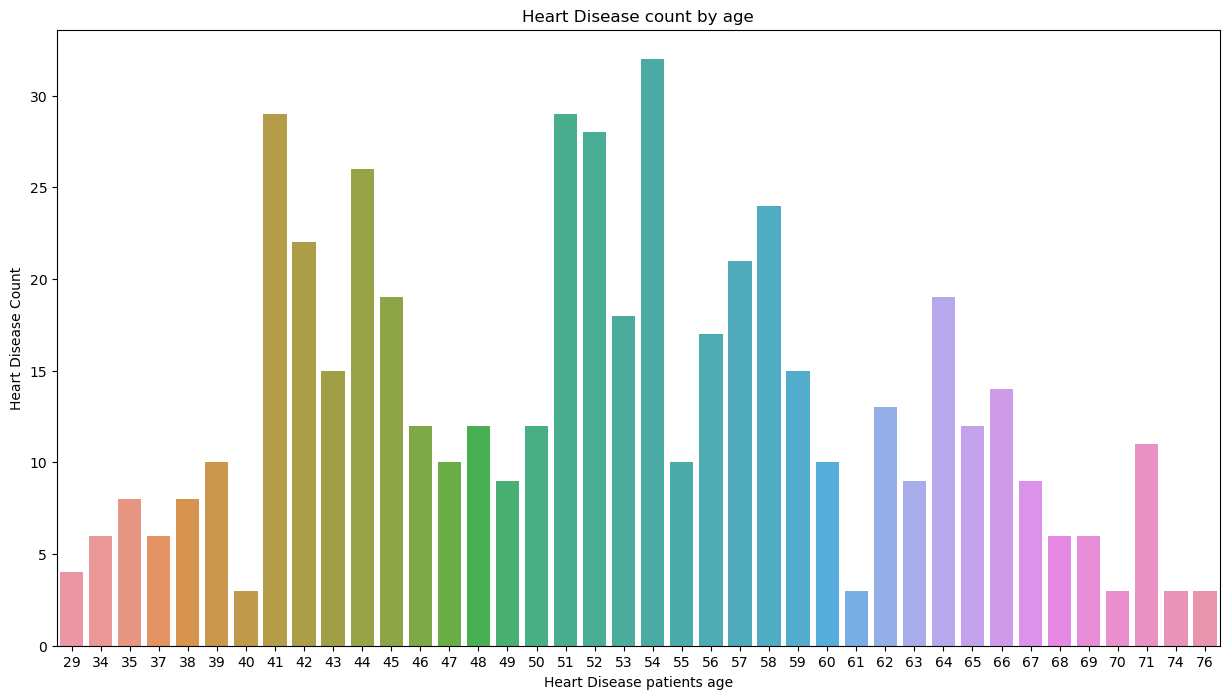

In [19]:
Disease_group_age = df[df['target']==1]
df_age = Disease_group_age['age'].value_counts()
plt.rcParams['figure.figsize'] = (15,8)
sns.barplot(x=df_age.index, y=df_age.values)
plt.xlabel('Heart Disease patients age')
plt.ylabel('Heart Disease Count')
plt.title('Heart Disease count by age')
plt.show()

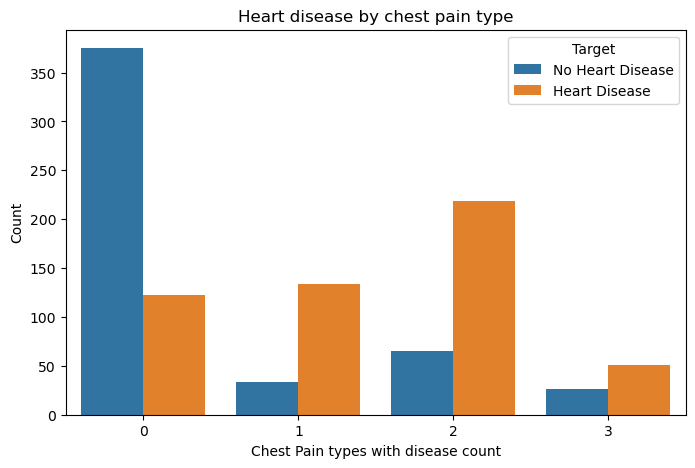

In [14]:
sns.countplot(x='cp', hue='target', data=df)
plt.legend(title='Target',labels = ['No Heart Disease','Heart Disease'])
plt.xlabel('Chest Pain types with disease count')
plt.ylabel('Count')
plt.title('Heart disease by chest pain type')
plt.show()

In [15]:
df['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

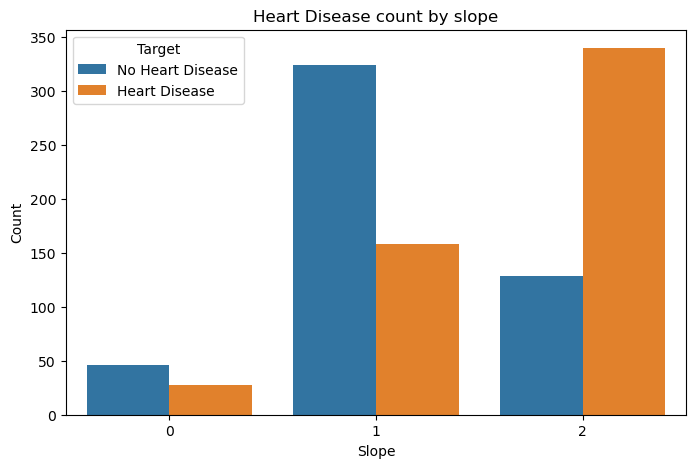

In [16]:
sns.countplot(x='slope', hue='target', data=df)
plt.legend(title='Target',labels = ['No Heart Disease','Heart Disease'])
plt.xlabel('Slope')
plt.ylabel('Count')
plt.title('Heart Disease count by slope')
plt.show()

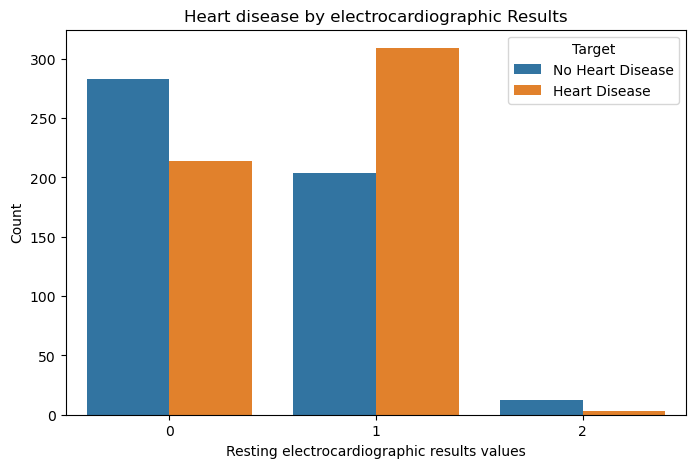

In [18]:
sns.countplot(x='restecg', hue='target', data=df)
plt.legend(title='Target',labels = ['No Heart Disease','Heart Disease'])
plt.title('Heart disease by electrocardiographic Results')
plt.xlabel('Resting electrocardiographic results values')
plt.ylabel('Count')
plt.show()